In [642]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from scipy import stats
from scipy.stats import pearsonr,ttest_ind
import warnings
warnings.filterwarnings('ignore')


## Importing the Dataset

In [616]:
train = pd.read_csv("loan_train.csv")
test = pd.read_csv("loan_test.csv")

In [618]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [620]:
train.shape

(614, 12)

In [622]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban


In [624]:
test.shape

(367, 11)

In [626]:
train['Status'].value_counts()

Status
Y    422
N    192
Name: count, dtype: int64

# Data Cleaning

In [499]:
train.duplicated().sum()

0

In [500]:
train.isnull().sum()/train.shape[0]

Gender                0.021173
Married               0.004886
Dependents            0.024430
Education             0.000000
Self_Employed         0.052117
Applicant_Income      0.000000
Coapplicant_Income    0.000000
Loan_Amount           0.000000
Term                  0.022801
Credit_History        0.081433
Area                  0.000000
Status                0.000000
dtype: float64

In [501]:
train.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
Status                 object
dtype: object

In [502]:
for i in train.columns:
    if train[i].dtype == object:
        train[i] = train[i].fillna(train[i].mode()[0])
    elif train[i].dtype == float:
        train[i] = train[i].fillna(train[i].median())

In [503]:
train.isnull().sum()/train.shape[0]

Gender                0.0
Married               0.0
Dependents            0.0
Education             0.0
Self_Employed         0.0
Applicant_Income      0.0
Coapplicant_Income    0.0
Loan_Amount           0.0
Term                  0.0
Credit_History        0.0
Area                  0.0
Status                0.0
dtype: float64

In [504]:
test.isnull().sum()/train.shape[0]

Gender                0.017915
Married               0.000000
Dependents            0.016287
Education             0.000000
Self_Employed         0.037459
Applicant_Income      0.000000
Coapplicant_Income    0.000000
Loan_Amount           0.000000
Term                  0.009772
Credit_History        0.047231
Area                  0.000000
dtype: float64

In [505]:
test.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income      int64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
dtype: object

In [506]:
for i in test.columns:
    if test[i].dtype == object:
        test[i] = test[i].fillna(test[i].mode()[0])
    elif test[i].dtype == float:
        test[i] = test[i].fillna(test[i].median())

In [520]:
test.isnull().sum()/train.shape[0]

Gender                0.0
Married               0.0
Dependents            0.0
Education             0.0
Self_Employed         0.0
Applicant_Income      0.0
Coapplicant_Income    0.0
Loan_Amount           0.0
Term                  0.0
Credit_History        0.0
Area                  0.0
dtype: float64

In [521]:
test.duplicated().sum()

1

In [522]:
test.drop_duplicates(keep='first',inplace=True)

In [523]:
test.duplicated().sum()

0

In [524]:
print(test.shape,train.shape)

(366, 11) (614, 12)


## EDA

In [526]:
train['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

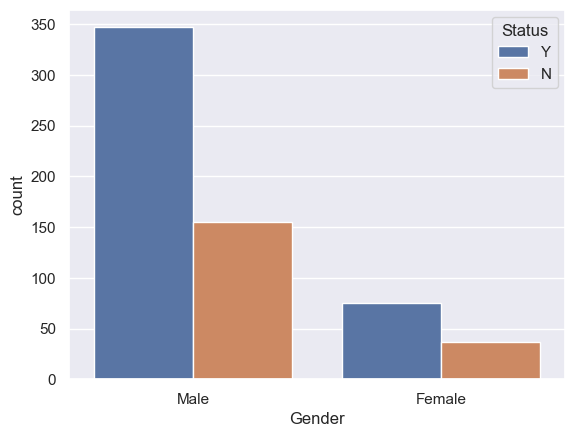

In [527]:
sns.countplot(x = 'Gender',data = train, hue='Status')

Male applicant are more than female applicant and may be that is why their frequency of loan Approval is high.

Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

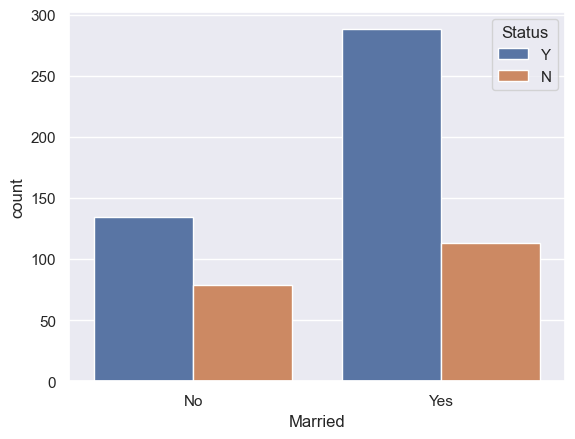

In [529]:
print(train['Married'].value_counts())
sns.countplot(x = 'Married',data=train,hue='Status')

Married applicant are high then Unmarried but that does not much affect significantly the loan approval status.

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

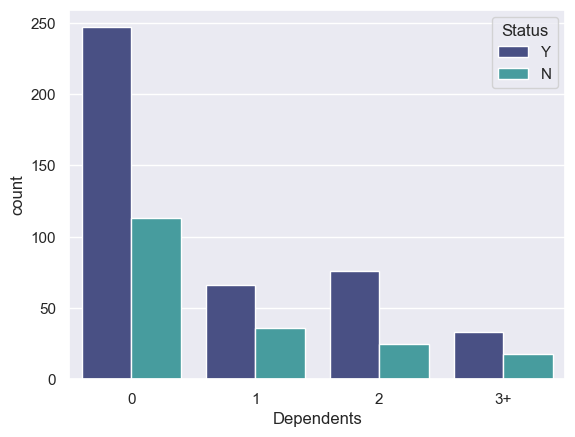

In [531]:
print(train['Dependents'].value_counts())
sns.countplot(x = 'Dependents',data=train,hue='Status',palette="mako")

More no. of dependent the loan approval significantly.So less no. of dependents lit bit increses the chances of approval for loan. 

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

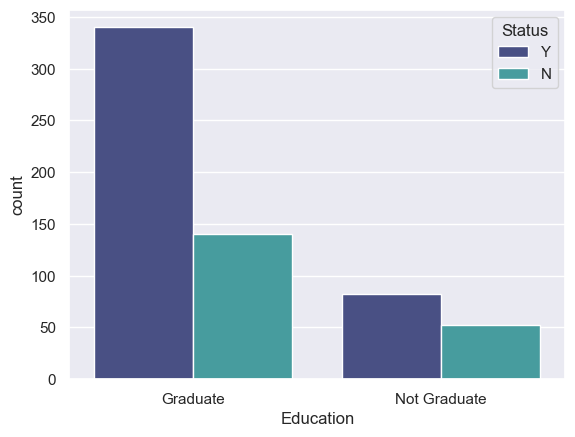

In [533]:
print(train['Education'].value_counts())
sns.countplot(x = 'Education',data=train,hue='Status',palette="mako")

Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

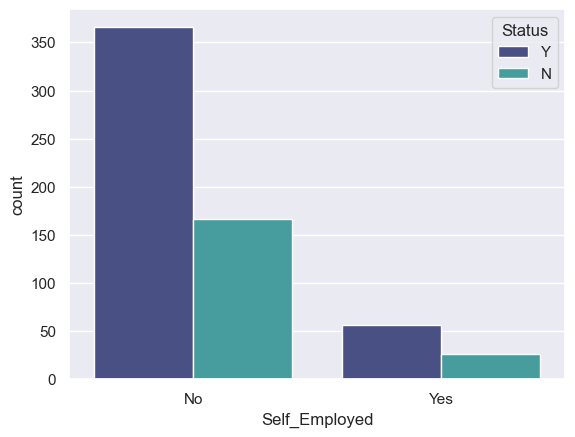

In [541]:
print(train['Self_Employed'].value_counts())
sns.countplot(x = 'Self_Employed',data=train,hue='Status',palette="mako")

If a person is self employed it does affect the loan approval and infact it decreses the bit chances of approved

skewness of Applicant_Income: 6.5395131139946185
skewness of Coapplicant_Income: 7.491531216657304
skewness of Loan_Amount: 2.3754622597568487
skewness of Term: -2.4021122563890396


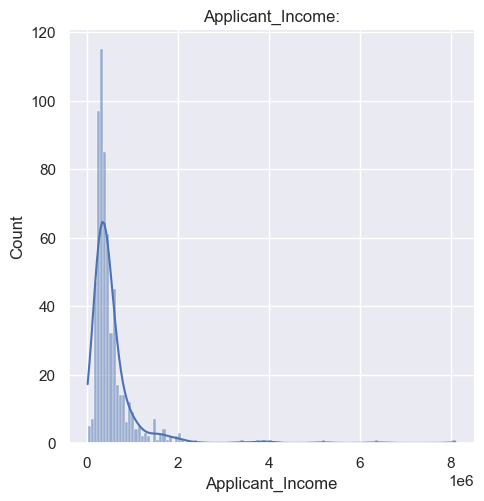

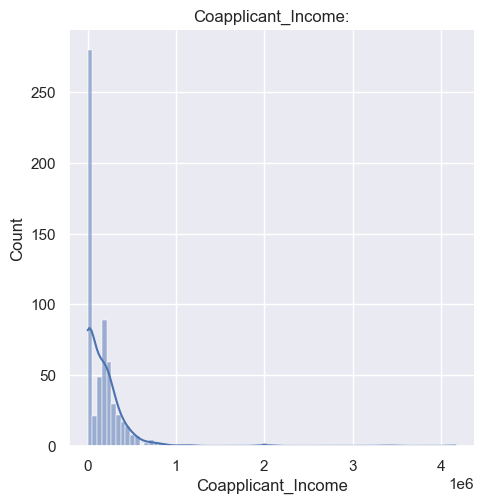

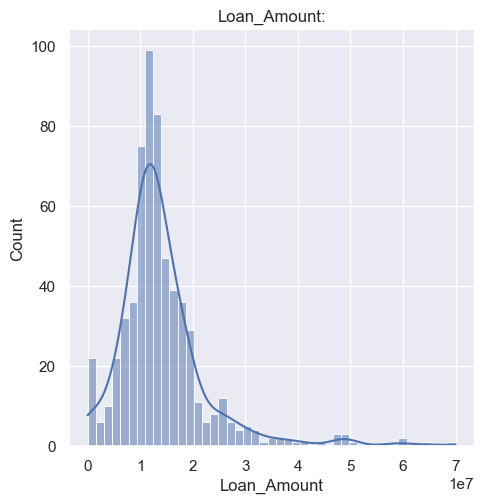

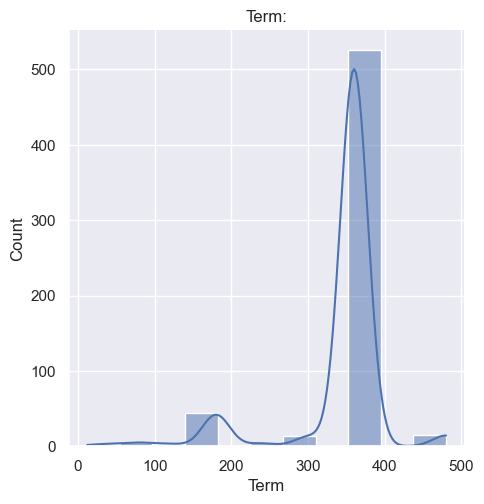

In [543]:
features = ['Applicant_Income','Coapplicant_Income','Loan_Amount','Term']
for i, col in enumerate(features):
    sns.displot(x=train[col],kde=True)
    print(f'skewness of {col}:', train[col].skew())
    plt.title(f'{col}:')
plt.show()

As we can see all these Applicant_Income,Coapplicant_Income,Loan_Amount,Term are skewed.

In [545]:
print(train['Credit_History'].value_counts())


Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

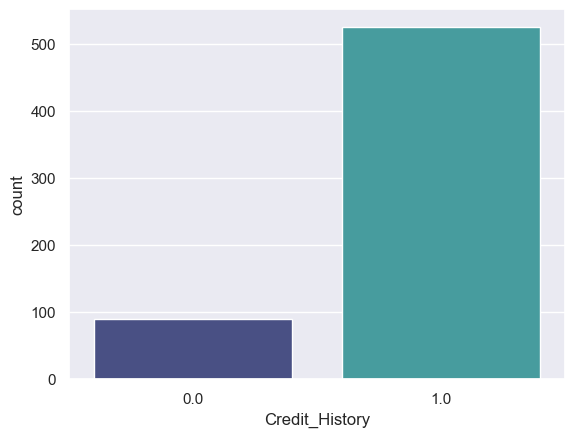

In [546]:
sns.countplot(x = 'Credit_History',data=train,palette="mako")

As we can see number of good credit history is more than the number of bad credit histoy

In [548]:
print("Percentage of Applicant having Good Credit History:",(train[train['Credit_History'] == 1].shape[0]/len(train['Credit_History']))*100)
print("Percentage of Applicant having Bad Credit History:",(train[train['Credit_History'] == 0].shape[0]/len(train['Credit_History']))*100)

Percentage of Applicant having Good Credit History: 85.50488599348535
Percentage of Applicant having Bad Credit History: 14.495114006514658


Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


<Axes: xlabel='Area', ylabel='count'>

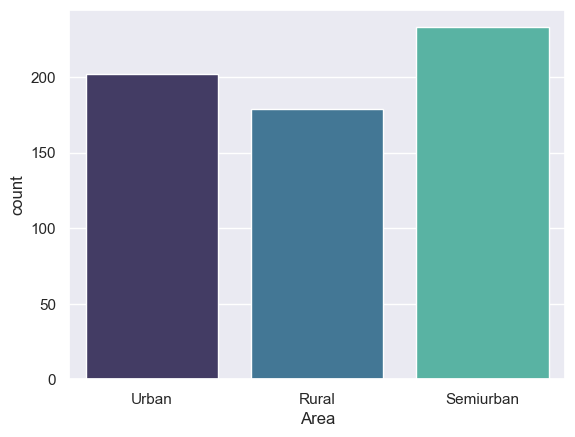

In [549]:
print(train['Area'].value_counts())
sns.countplot(x = 'Area',data=train,palette="mako")

In [550]:
print("Percentage of Applicant having Urban:",(train[train['Area'] == 'Urban'].shape[0]/len(train['Area']))*100)
print("Percentage of Applicant having rural:",(train[train['Area'] == 'Rural'].shape[0]/len(train['Area']))*100)
print("Percentage of Applicant having rural:",(train[train['Area'] == 'Semiurban'].shape[0]/len(train['Area']))*100)

Percentage of Applicant having Urban: 32.89902280130293
Percentage of Applicant having rural: 29.153094462540718
Percentage of Applicant having rural: 37.94788273615635


Status
Y    422
N    192
Name: count, dtype: int64


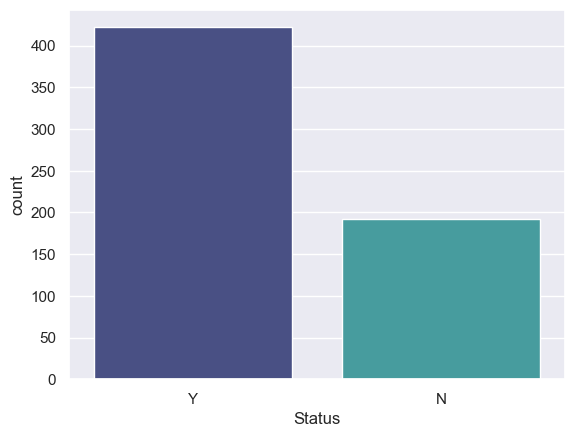

Percentage of loan approved: 68.72964169381108
Percentage of loan Not approved: 31.27035830618892


In [551]:
print(train['Status'].value_counts())
sns.countplot(x = 'Status',data=train,palette="mako")
plt.show()
print("Percentage of loan approved:",(train[train['Status'] == 'Y'].shape[0]/len(train['Status']))*100)
print("Percentage of loan Not approved:",(train[train['Status'] == 'N'].shape[0]/len(train['Status']))*100)

In [552]:
train[['Applicant_Income','Coapplicant_Income','Loan_Amount']].describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount
count,6.140000e+02,6.140000e+02,6.140000e+02
mean,5.403459e+05,1.621246e+05,1.414104e+07
std,6.109042e+05,2.926248e+05,8.815682e+06
min,1.500000e+04,0.000000e+00,0.000000e+00
25%,2.877500e+05,0.000000e+00,9.800000e+06
50%,3.812500e+05,1.188500e+05,1.250000e+07
75%,5.795000e+05,2.297250e+05,1.647500e+07
max,8.100000e+06,4.166700e+06,7.000000e+07


skewness of Applicant_Income: 6.5395131139946185
skewness of Coapplicant_Income: 7.491531216657304
skewness of Loan_Amount: 2.3754622597568487


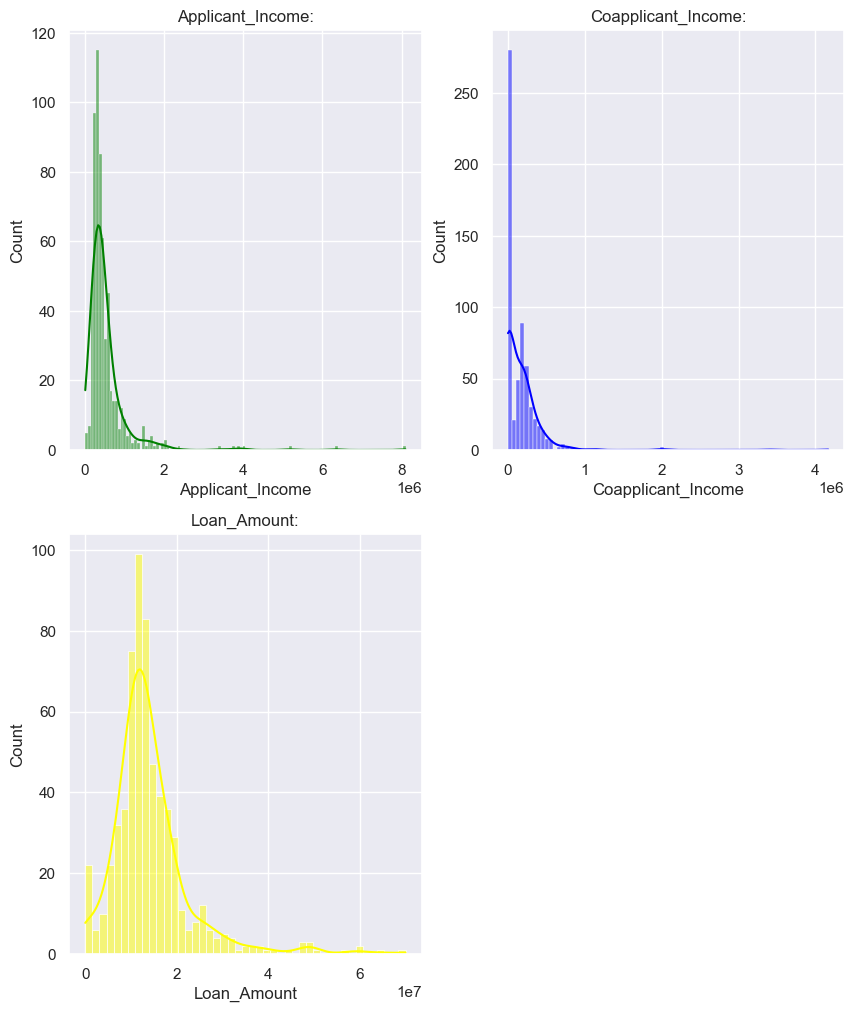

In [553]:
features = ['Applicant_Income','Coapplicant_Income','Loan_Amount']
color = ['green','blue','yellow']
sns.set(style='darkgrid')
plt.figure(figsize=(10,12))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.histplot(x=train[col],kde=True,color=color[i])
    print(f'skewness of {col}:', train[col].skew())
    plt.title(f'{col}:')
plt.show()

Voilin Plot

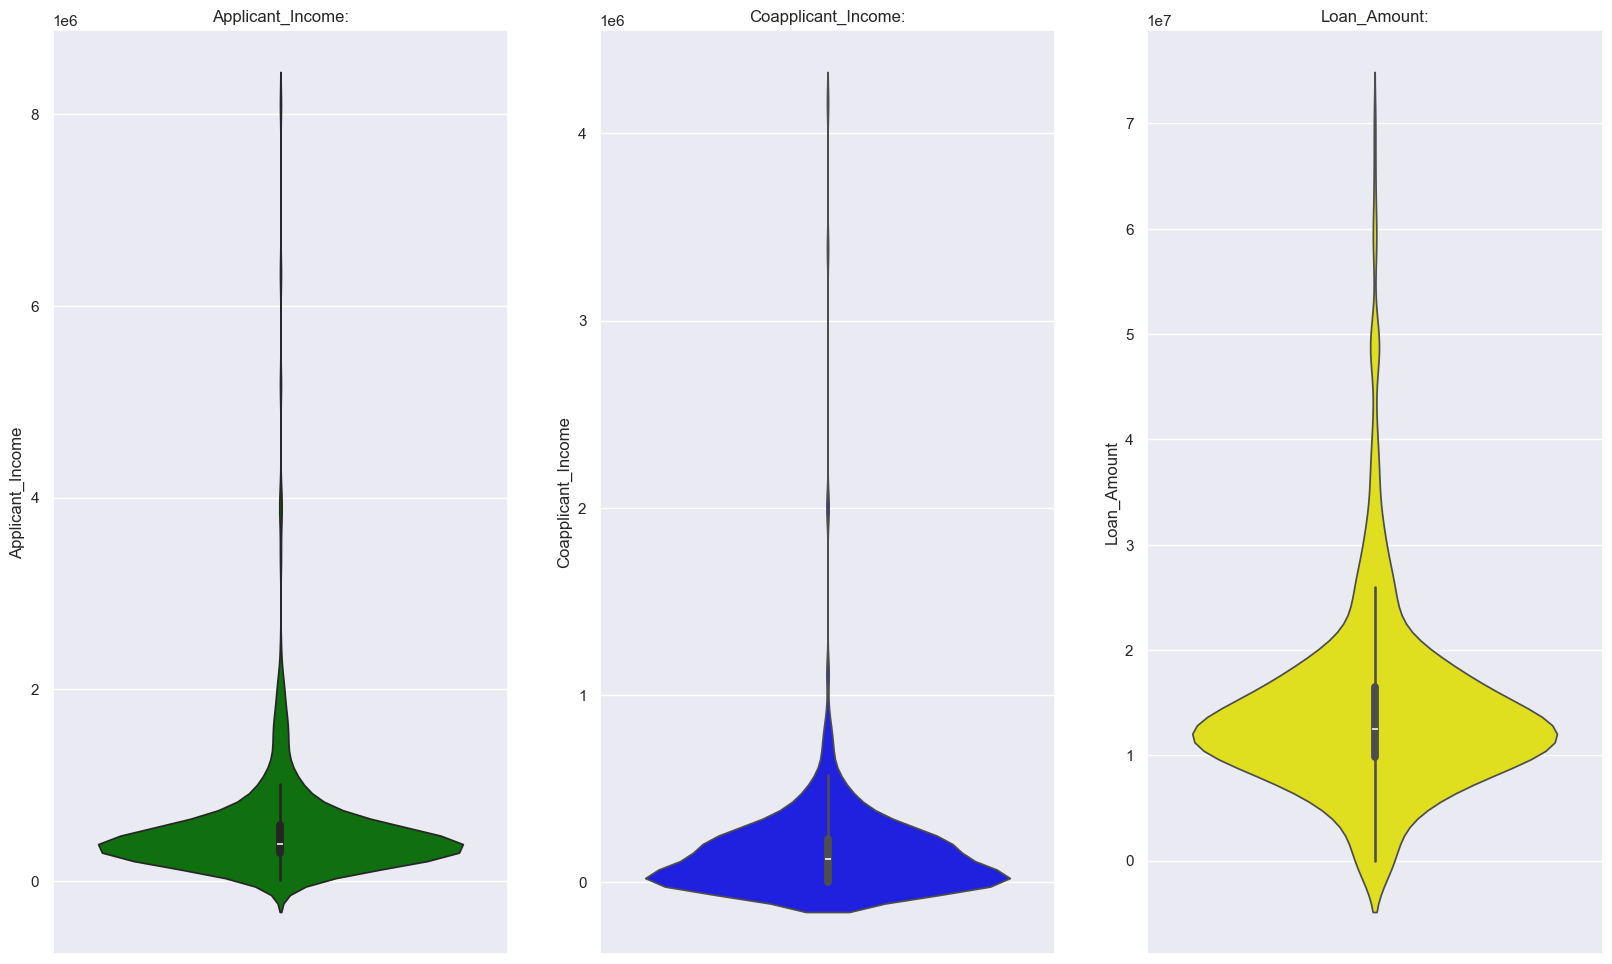

In [555]:
features = ['Applicant_Income','Coapplicant_Income','Loan_Amount']
color = ['green','blue','yellow']
sns.set(style='darkgrid')
plt.figure(figsize=(20,12))
for i, col in enumerate(features):
    plt.subplot(1,3,i+1)
    sns.violinplot(train[col],color=color[i])
    plt.title(f'{col}:')
plt.show()

<Axes: >

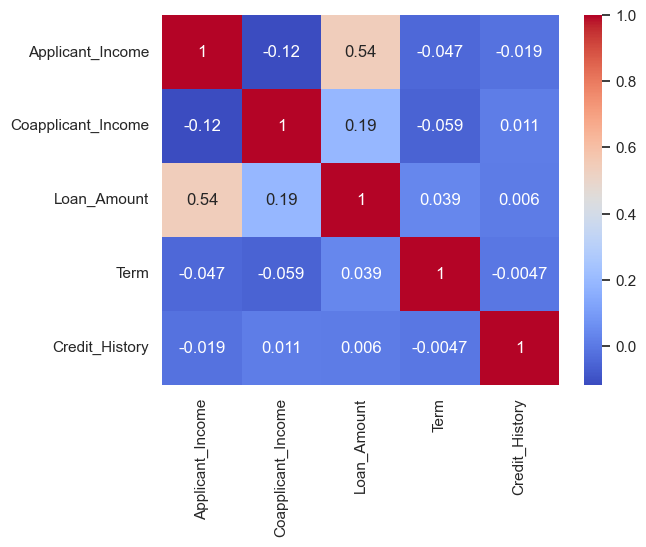

In [559]:
train_num = train.select_dtypes(include=[float,int])
sns.heatmap(train_num.corr(),annot=True,cmap="coolwarm")

Text(0.5, 1.0, 'Gender vs married')

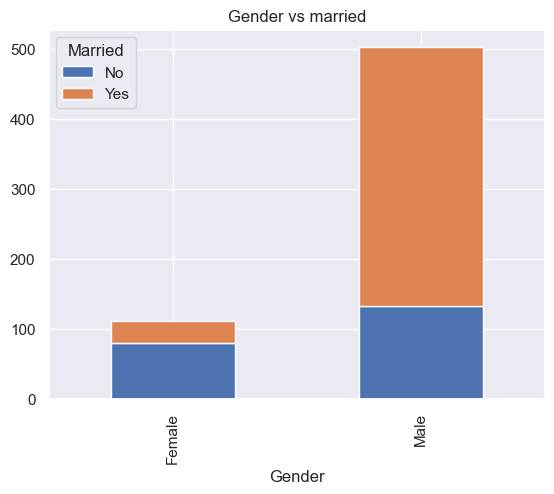

In [561]:
# gender vs married
pd.crosstab(train.Gender,train.Married).plot(kind='bar',stacked=True)
plt.title('Gender vs married')

Married Males applicant are more than married female applicant 

Text(0.5, 1.0, 'Self_employed vs Credit_history')

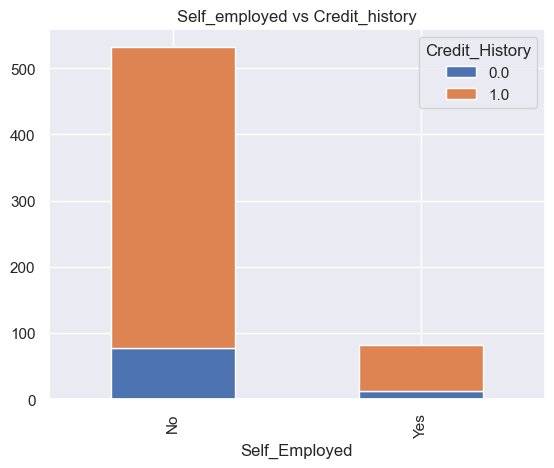

In [563]:
# Self_employed vs Credit_history
pd.crosstab(train.Self_Employed, train.Credit_History).plot(kind='bar',stacked=True)
plt.title('Self_employed vs Credit_history')

 Credit history of not self_employed are good then self employed.

Text(0.5, 1.0, 'Property area vs loan status')

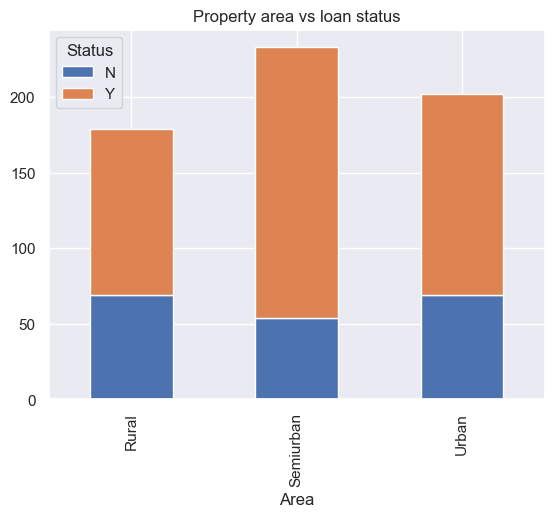

In [565]:
# property area vs loan status
pd.crosstab(train.Area, train.Status).plot(kind='bar',stacked=True)
plt.title('Property area vs loan status')

Semiurban applicant are more and have higher loan approval followed by Urban and Rural

<Axes: xlabel='Status', ylabel='Applicant_Income'>

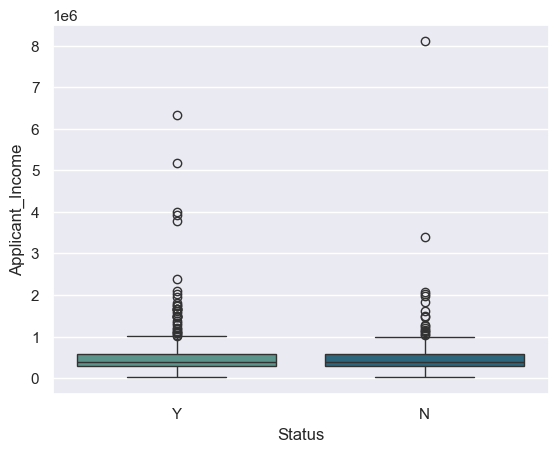

In [567]:
sns.boxplot(x='Status',y='Applicant_Income',data=train,palette="crest")

As we can see there are outliers as applicant income is high but the loan is not apploved which should not be the case this is clear cut of outliers in data

<Axes: xlabel='Status', ylabel='Coapplicant_Income'>

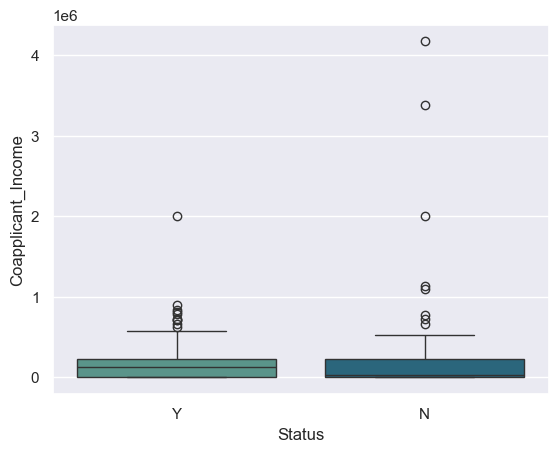

In [569]:
sns.boxplot(x='Status',y='Coapplicant_Income',data=train,palette="crest")

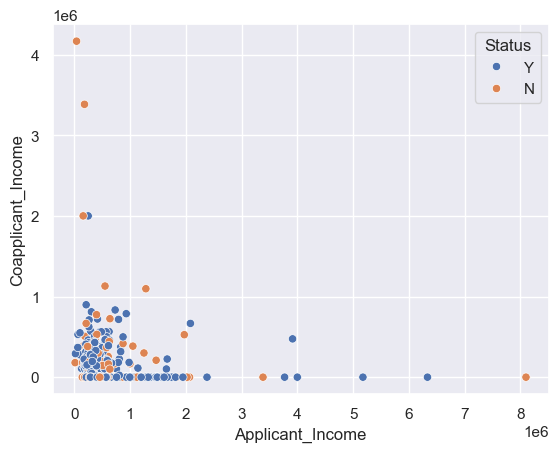

Pearson correlation: -0.11660458122889981
t Test and P-value: TtestResult(statistic=13.835753259915663, pvalue=1.4609839484240346e-40, df=1226.0)


In [570]:
# how the Applicant income and Coapplicant income correlated with status 
sns.scatterplot(x='Applicant_Income',y='Coapplicant_Income',data=train,hue='Status')
plt.show()
print('Pearson correlation:',train['Applicant_Income'].corr(train['Coapplicant_Income']))
print('t Test and P-value:',stats.ttest_ind(train['Applicant_Income'],train['Coapplicant_Income']))

#### there exists a negative correlation between Applicant income and Coapplicant income.
#### The confidence coefficient is significant at the 95% CI, as its pvalue is of 1.46

<Axes: xlabel='Status', ylabel='Loan_Amount'>

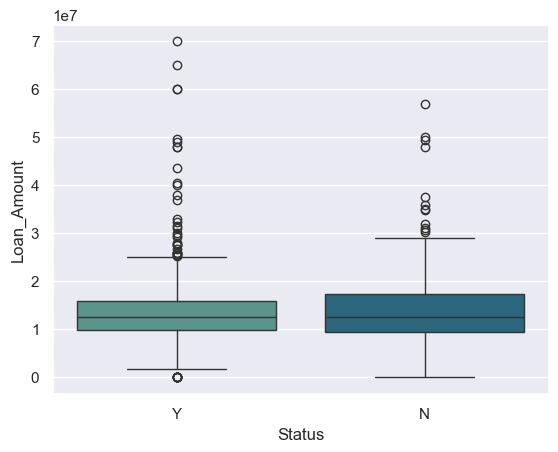

In [574]:
sns.boxplot(x='Status',y='Loan_Amount',data=train,palette="crest")

<Axes: xlabel='Applicant_Income', ylabel='Coapplicant_Income'>

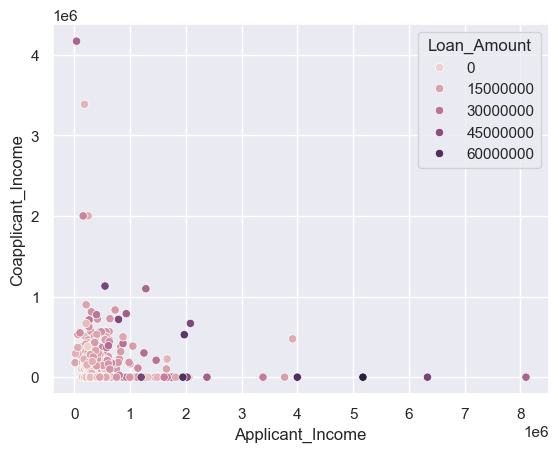

In [575]:
# how the Applicant income and Coapplicant income correlated with loan_amount
sns.scatterplot(x='Applicant_Income',y='Coapplicant_Income',data=train,hue='Loan_Amount')

### DATA PREPROCESSING

OneHotEncoding and LabelEncoding

In [597]:
train = pd.get_dummies(train,dtype=int)
train.head()
# Drop columns
train = train.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No','Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed','Status_Y':'Status'}

train.rename(columns = new, inplace = True)

In [725]:
test = pd.get_dummies(test,dtype=int)

# Drop columns
test = test.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Status'}

test.rename(columns = new, inplace = True)

In [601]:
q1 = train.quantile(0.25)
q3 = train.quantile(0.75)
iqr = q3 - q1

train = train[~((train < (q1 - 1.5 * iqr)) |(train > (q3 + 1.5 * iqr))).any(axis = 1)]

In [603]:
q1 = test.quantile(0.25)
q3 = test.quantile(0.75)
iqr = q3 - q1

test = test[~((test < (q1 - 1.5 * iqr)) |(test > (q3 + 1.5 * iqr))).any(axis = 1)]

### REMOVE OUTLIER

#### Squared Root Transfomer

In [607]:
train.Applicant_Income = np.sqrt(train.Applicant_Income)
train.Coapplicant_Income = np.sqrt(train.Coapplicant_Income)
train.Loan_Amount = np.sqrt(train.Loan_Amount)

skewness of Applicant_Income: 0.3337891787332981
skewness of Coapplicant_Income: -0.3954755298807237
skewness of Loan_Amount: -1.819596018404784


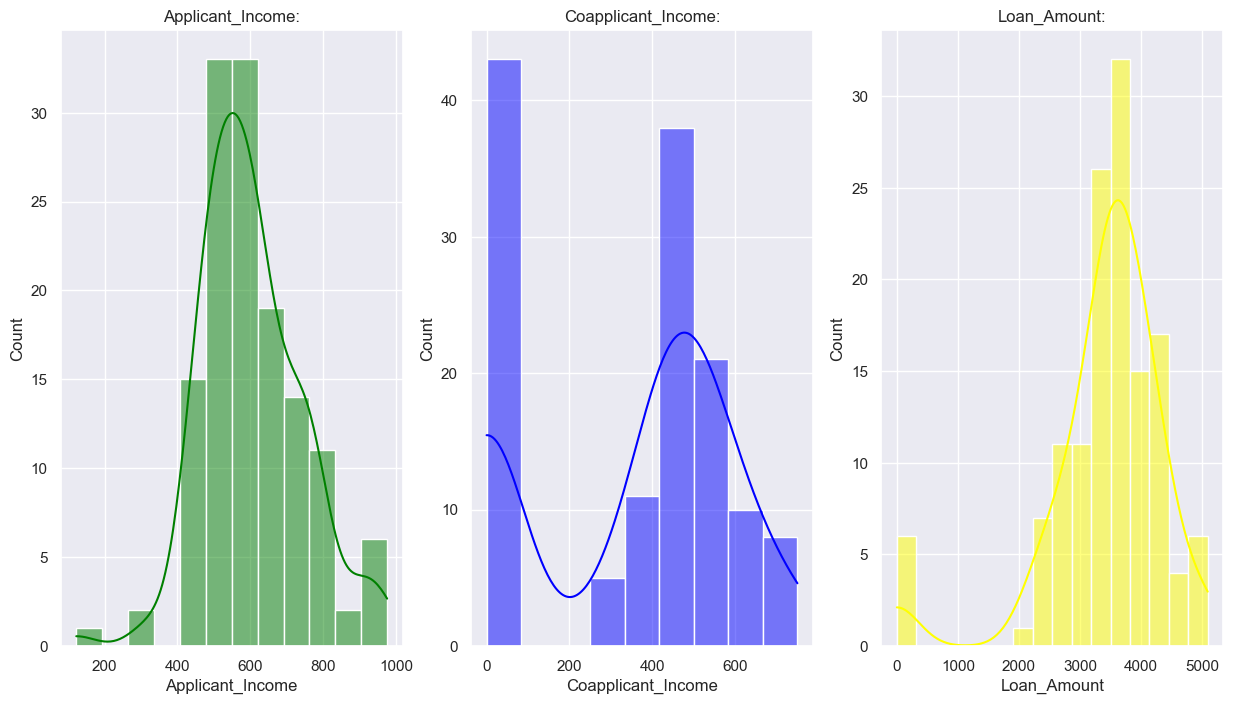

In [609]:
features = ['Applicant_Income','Coapplicant_Income','Loan_Amount']
color = ['green','blue','yellow']
sns.set(style='darkgrid')
plt.figure(figsize=(15,8))
for i, col in enumerate(features):
    plt.subplot(1,3,i+1)
    sns.histplot(x=train[col],kde=True,color=color[i])
    print(f'skewness of {col}:', train[col].skew())
    plt.title(f'{col}:')
plt.show()

#### After applying log transformer distribution is much better than original distribution

### Seperate train test data

In [614]:
x = train.drop(['Status'],axis=1)
y = train['Status']

## Dealing With Imbalanced Dataset

### SMOTE

In [632]:
x,y = SMOTE().fit_resample(x,y)

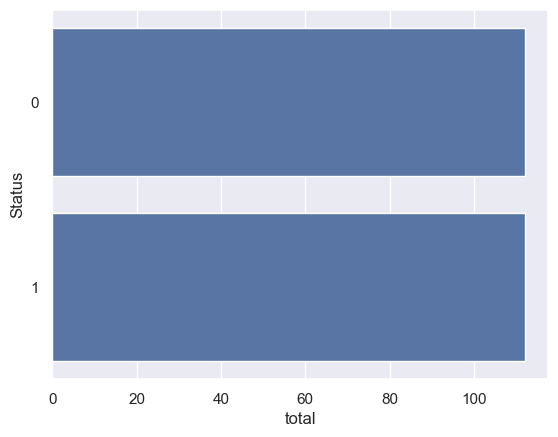

In [634]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y,data=train)
plt.ylabel=("Status")
plt.xlabel("total")
plt.show()

#### We can see data is Balanced

## DATA NORMALISATION

In [638]:
X_train,X_test,y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [644]:
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

# MODEL TRAINING

## LogisticRegression

In [713]:
lr = LogisticRegression(solver='saga',max_iter=500,random_state=1)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Classification_Report",classification_report(Y_test,y_pred))
print("Confusion_matrix",confusion_matrix(Y_test,y_pred))
from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(Y_test,y_pred)
print("Accuracy_Score",accuracy_score(Y_test,y_pred)*100)

Classification_Report               precision    recall  f1-score   support

           0       0.75      0.72      0.73        25
           1       0.67      0.70      0.68        20

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.71      0.71        45

Confusion_matrix [[18  7]
 [ 6 14]]
Accuracy_Score 71.11111111111111


## KNN

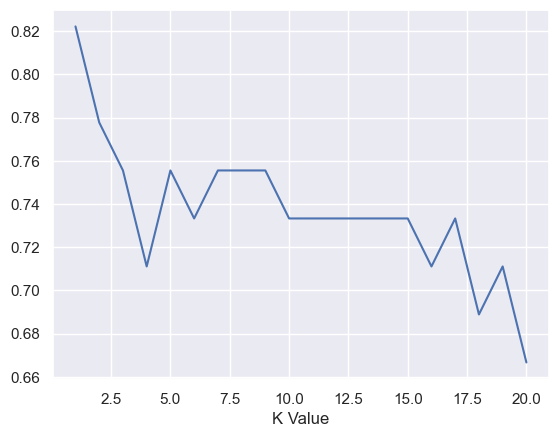

KNN Accuracy_score: 0.8222222222222222


In [711]:
inertia_score = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    inertia_score.append(knn.score(X_test,Y_test))
    
plt.plot(range(1,21),inertia_score)
plt.xticks(rotation='horizontal')
plt.xlabel("K Value")
plt.show()
KNNAcc = max(inertia_score)
print("KNN Accuracy_score:",max(inertia_score))

## DECISION TREE

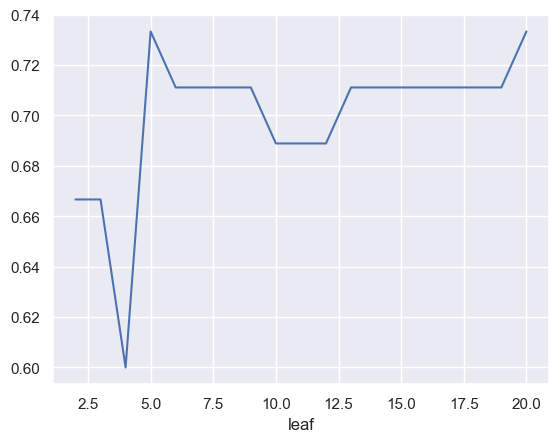

DECISION TREE Accuracy_score: 0.7333333333333333


In [708]:
score_dt = []
for i in range(2,21):
     dtc = DecisionTreeClassifier(max_leaf_nodes=i)
     dtc.fit(X_train,y_train)
     score_dt.append(dtc.score(X_test,Y_test))
    
plt.plot(range(2,21),score_dt)
plt.xticks(rotation='horizontal')
plt.xlabel("leaf")
plt.show()
DTAcc = max(score_dt)
print("DECISION TREE Accuracy_score:",max(score_dt))

## RandomForest

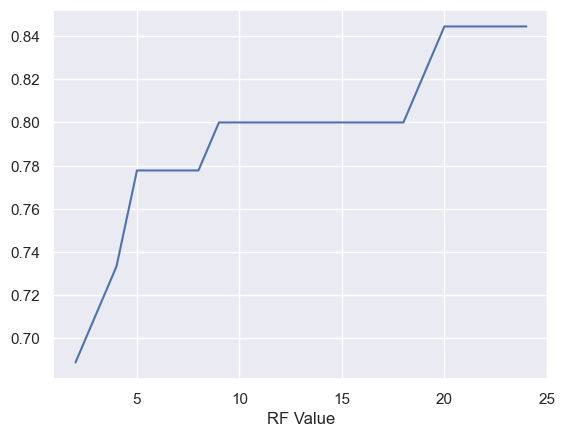

Random Forest Accuracy_score: 0.8444444444444444


In [717]:
score_rf = []
for i in range(2,25):
     rf = RandomForestClassifier(n_estimators=1000,random_state=1,max_leaf_nodes=i)
     rf.fit(X_train,y_train)
     score_rf.append(rf.score(X_test,Y_test))
    
plt.plot(range(2,25),score_rf)
plt.xticks(rotation='horizontal')
plt.xlabel("RF Value")
plt.show()
RFAcc = max(score_rf)
print("Random Forest Accuracy_score:",max(score_rf))

## Gradient Boosting

In [688]:
paramsGB={'n_estimators' : [100,200,300,400,500],
      'max_depth' : [1,2,3,4,5],
      'subsample' : [0.5,1],
      'max_leaf_nodes' : [2,5,10,20,30,40,50]}

In [692]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [693]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=50, n_estimators=500,
                           subsample=0.5)
0.8152777777777777
{'subsample': 0.5, 'n_estimators': 500, 'max_leaf_nodes': 50, 'max_depth': 5}
8


In [700]:
gbc = GradientBoostingClassifier(subsample = 0.5, n_estimators = 400, max_depth = 4, max_leaf_nodes = 10)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,Y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.74      0.85      0.79        20

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.81      0.80      0.80        45

[[19  6]
 [ 3 17]]
Gradient Boosting accuracy: 80.00%


In [702]:
paramsXG = {'n_estimators' : [100,200,300,400,500],
      'max_depth' : [1,2,3,4,5],
      'learning_rate' : [0.1,0.2,0.3,0.5]}
XG = RandomizedSearchCV(XGBClassifier(), paramsXG, cv=20)
XG.fit(X_train, y_train)
print(XG.best_estimator_)
print(XG.best_score_)
print(XG.best_params_)
print(XG.best_index_)
xgb = XGBClassifier(n_estimators=200, max_depth=2, learning_rate=0.3)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

XGAcc = accuracy_score(y_pred,Y_test)
print('XGBoost accuracy: {:.2f}%'.format(XGAcc*100))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
0.7986111111111112
{'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}
4
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.81      0.85      0.83        20

  

In [718]:
comparison = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'Decision Tree',
                                  'Random Forest', 'Gradient Boost','XG Boost'],
                        'Accuracy': [LRAcc*100, KNNAcc*100, DTAcc*100,
                                     RFAcc*100, GBAcc*100, XGAcc*100]})
comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Random Forest,84.444444
5,XG Boost,84.444444
1,K Neighbors,82.222222
4,Gradient Boost,80.000000
2,Decision Tree,73.333333
0,Logistic Regression,71.111111


#### Will Go With XgBoost to calculate the y_pred for out of test loan dataset

In [727]:
y_pred = xgb.predict(test)

In [729]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,